<a href="https://colab.research.google.com/github/SajlaKM/CancerClassifier/blob/main/Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Import required libraries

In [1]:
import os
import cv2
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import drive
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

In [4]:

drive.mount('/content/drive')
DATASET_PATH = "/content/drive/MyDrive/GitHub dataset /dataset.zip"
extract_path = "/content/dataset"
with zipfile.ZipFile(DATASET_PATH, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Extracted files:", os.listdir(extract_path))

Mounted at /content/drive
Extracted files: ['Training', 'Testing']


In [3]:

image_size = (227, 227)  # As per architecture

# Define training path
train_path = os.path.join(extract_path, "Training")

images = []
labels = []

# Iterate through class folders (e.g., 'glioma', 'meningioma', etc.)
for label in os.listdir(train_path):
    label_path = os.path.join(train_path, label)

    # Ensure it's a directory (to avoid processing files by mistake)
    if not os.path.isdir(label_path):
        continue

    # Process each image inside the class folder
    for img_name in os.listdir(label_path):
        img_path = os.path.join(label_path, img_name)

        # ✅ Skip directories (ensure only image files are processed)
        if os.path.isdir(img_path):
            continue

        try:
            img = load_img(img_path, target_size=image_size)  # Load image
            img_array = img_to_array(img) / 255.0  # Normalize
            images.append(img_array)
            labels.append(label)  # Store class
        except Exception as e:
            print(f"Skipping {img_path}: {e}")  # Handle potential errors

print(f"Total images loaded: {len(images)}")
print(f"Total labels loaded: {len(labels)}")

Total images loaded: 5712
Total labels loaded: 5712


In [8]:
!pip uninstall -y tensorflow keras
!pip install tensorflow keras


Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.7 MB/s eta 0:00:00


Total images loaded: 5712
Total labels loaded: 5712
Training set: (4569, 227, 227, 3), Validation set: (1143, 227, 227, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 693s 5s/step - accuracy: 0.2557 - loss: 1.8030 - val_accuracy: 0.2607 - val_loss: 1.3850
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 683s 5s/step - accuracy: 0.2858 - loss: 1.3834 - val_accuracy: 0.2607 - val_loss: 1.3851
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 680s 5s/step - accuracy: 0.2780 - loss: 1.3849 - val_accuracy: 0.2607 - val_loss: 1.3852
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 680s 5s/step - accuracy: 0.2883 - loss: 1.3833 - val_accuracy: 0.2607 - val_loss: 1.3850
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 678s 5s/step - accuracy: 0.2967 - loss: 1.3804 - val_accuracy: 0.2607 - val_loss: 1.3849
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 678s 5s/step - accuracy: 0.2795 - loss: 1.3846 - val_accuracy: 0.2607 - val_loss: 1.3853
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 678s 5s/step - accuracy: 0.2853 - loss: 1.3827 - val_accuracy: 0.2607 - val_loss: 1.3858
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 681s 5s/step - accuracy: 0.2830 - loss: 1.3840 - val_accu

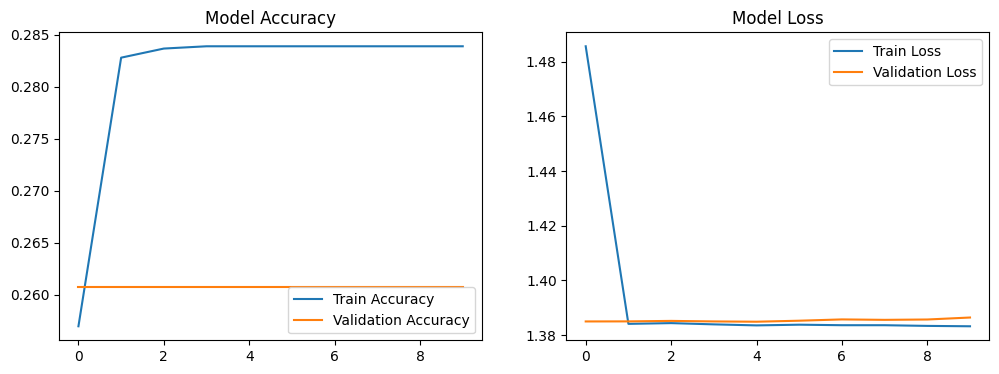

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Define constants
image_size = (227, 227)  # As per architecture
batch_size = 32
num_classes = 4  # glioma, meningioma, pituitary, no tumor

# Define dataset path
train_path = "/content/dataset/Training"

# ✅ Load images & labels
images = []
labels = []

for label in os.listdir(train_path):
    label_path = os.path.join(train_path, label)

    if not os.path.isdir(label_path):
        continue  # Ensure it's a directory

    for img_name in os.listdir(label_path):
        img_path = os.path.join(label_path, img_name)

        if os.path.isdir(img_path):
            continue  # Skip directories

        try:
            img = load_img(img_path, target_size=image_size)  # Load image
            img_array = img_to_array(img) / 255.0  # Normalize
            images.append(img_array)
            labels.append(label)  # Store class
        except Exception as e:
            print(f"Skipping {img_path}: {e}")

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

print(f"Total images loaded: {len(images)}")
print(f"Total labels loaded: {len(labels)}")

# ✅ Encode labels into integers
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded, num_classes)

# ✅ Split dataset into Train (80%) & Validation (20%)
X_train, X_val, y_train, y_val = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}")

# 🔹 Build CNN Model (Inspired by AlexNet)
def build_model():
    model = Sequential([
        Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)),
        MaxPooling2D((3, 3), strides=2),

        Conv2D(256, (5, 5), activation='relu', padding="same"),
        MaxPooling2D((3, 3), strides=2),

        Conv2D(384, (3, 3), activation='relu', padding="same"),
        Conv2D(384, (3, 3), activation='relu', padding="same"),
        Conv2D(256, (3, 3), activation='relu', padding="same"),
        MaxPooling2D((3, 3), strides=2),

        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# ✅ Initialize & Compile Model
model = build_model()
#model.summary()

# ✅ Train Model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)
#history = model.fit(X_train[:100], y_train[:100], validation_data=(X_val[:20], y_val[:20]), epochs=2, batch_size=16)

# ✅ Evaluate Model
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"📊 Validation Accuracy: {val_acc * 100:.2f}%")

# ✅ Plot Training Performance
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


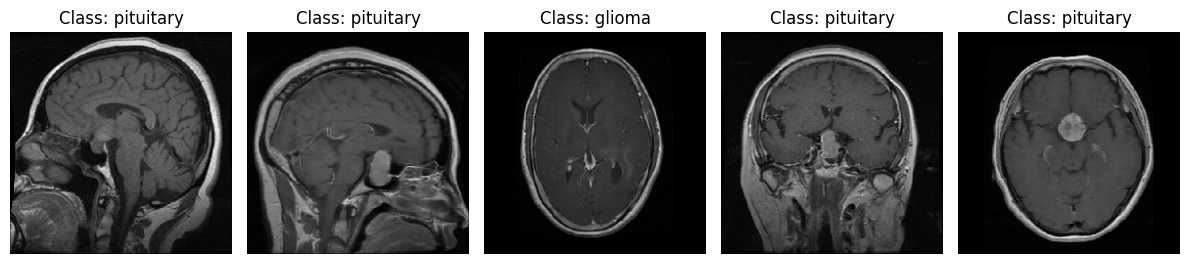

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert lists to numpy arrays for easier indexing
images = np.array(images)
labels = np.array(labels)

# Function to Display Sample Images with Labels
def plot_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(12, num_samples * 3))

    # Randomly select indices for visualization
    indices = np.random.choice(len(images), num_samples, replace=False)

    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[idx])  # Show MRI image
        plt.title(f"Class: {labels[idx]}")  # Display class label
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Plot a few sample MRI images with their class labels
plot_sample_images(images, labels, num_samples=5)

In [ ]:
print(images.shape)  # Expected output: (num_samples, 256, 256, 1) or (num_samples, 256, 256, 3)

(5712, 227, 227, 3)
